<a href="https://colab.research.google.com/github/simionattovini/thermal-machines/blob/main/Test%20Solutions/MTA_P2_1S2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas Térmicas A - P2 - 1S2024

## Enunciado

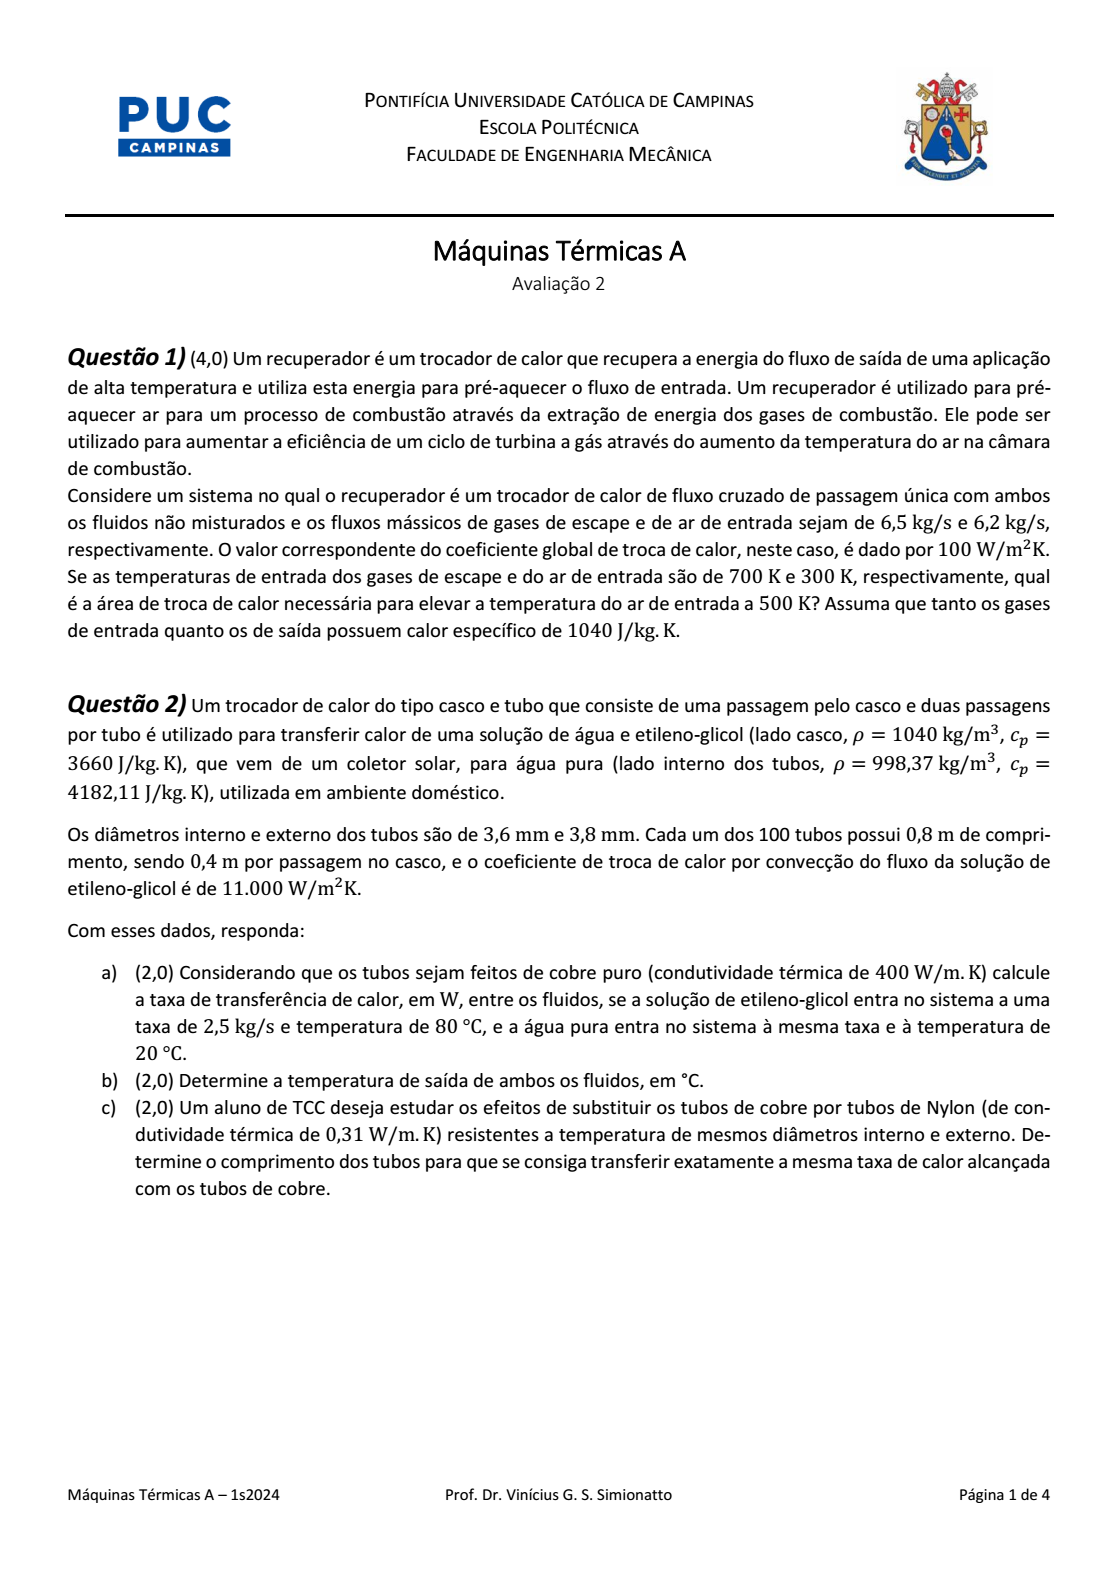

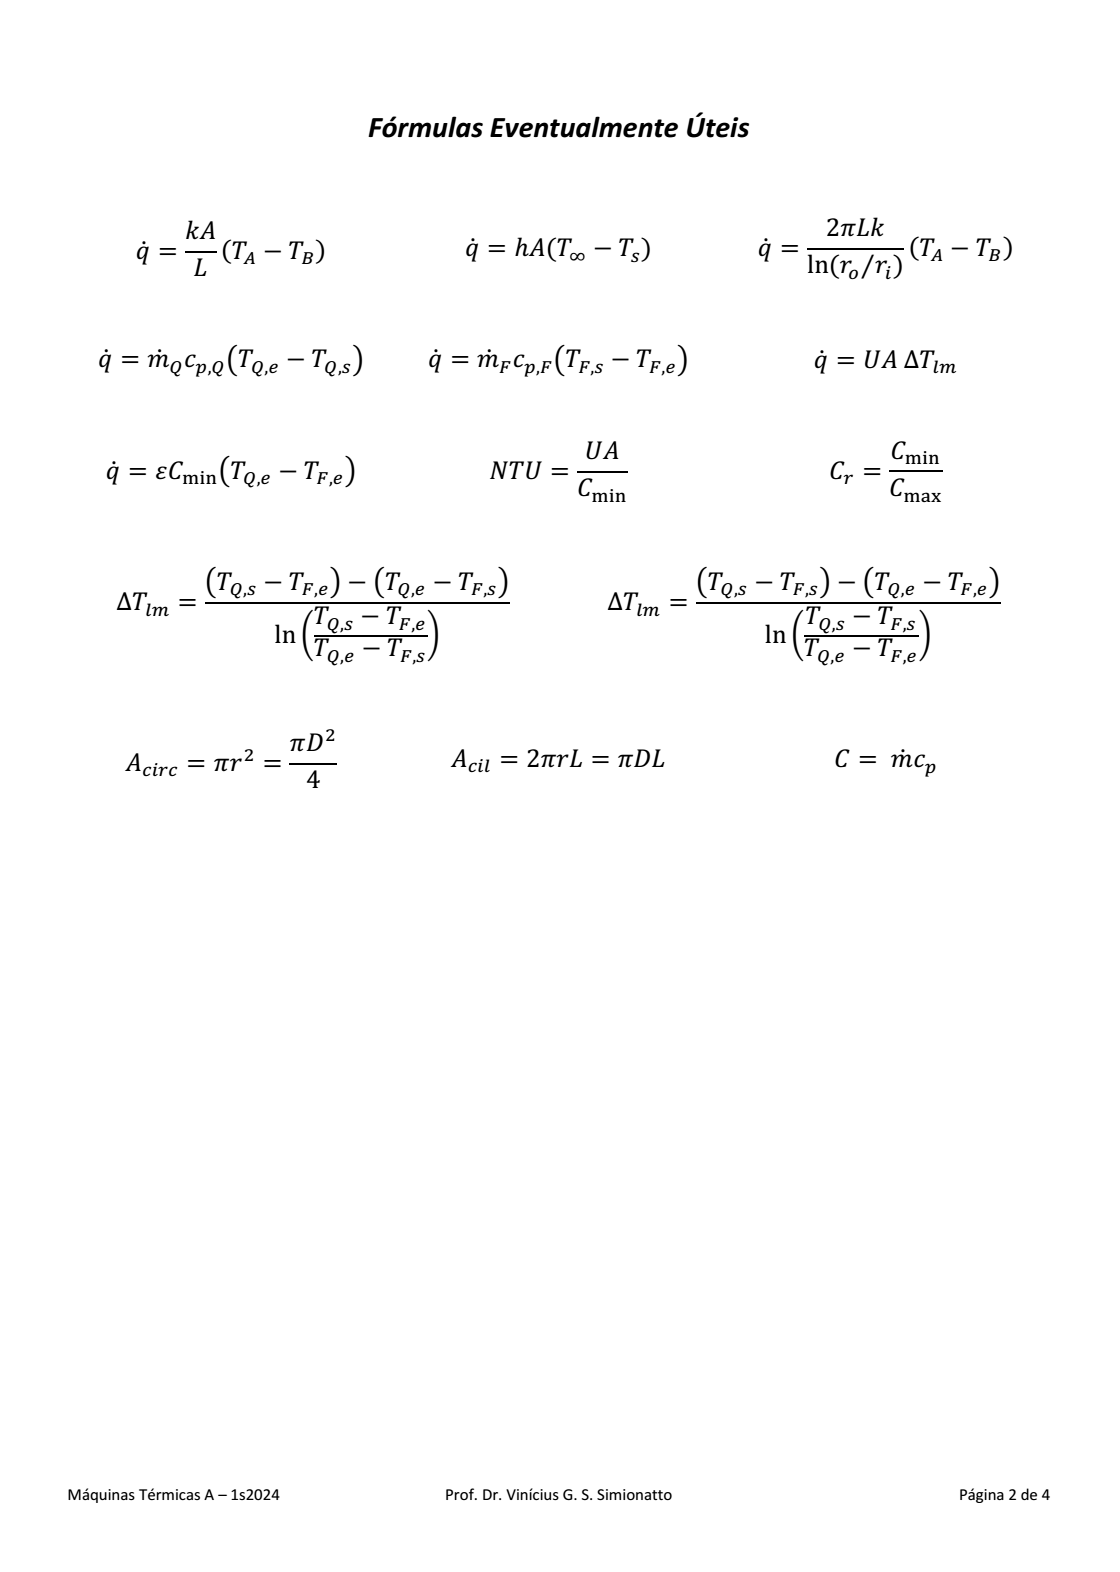

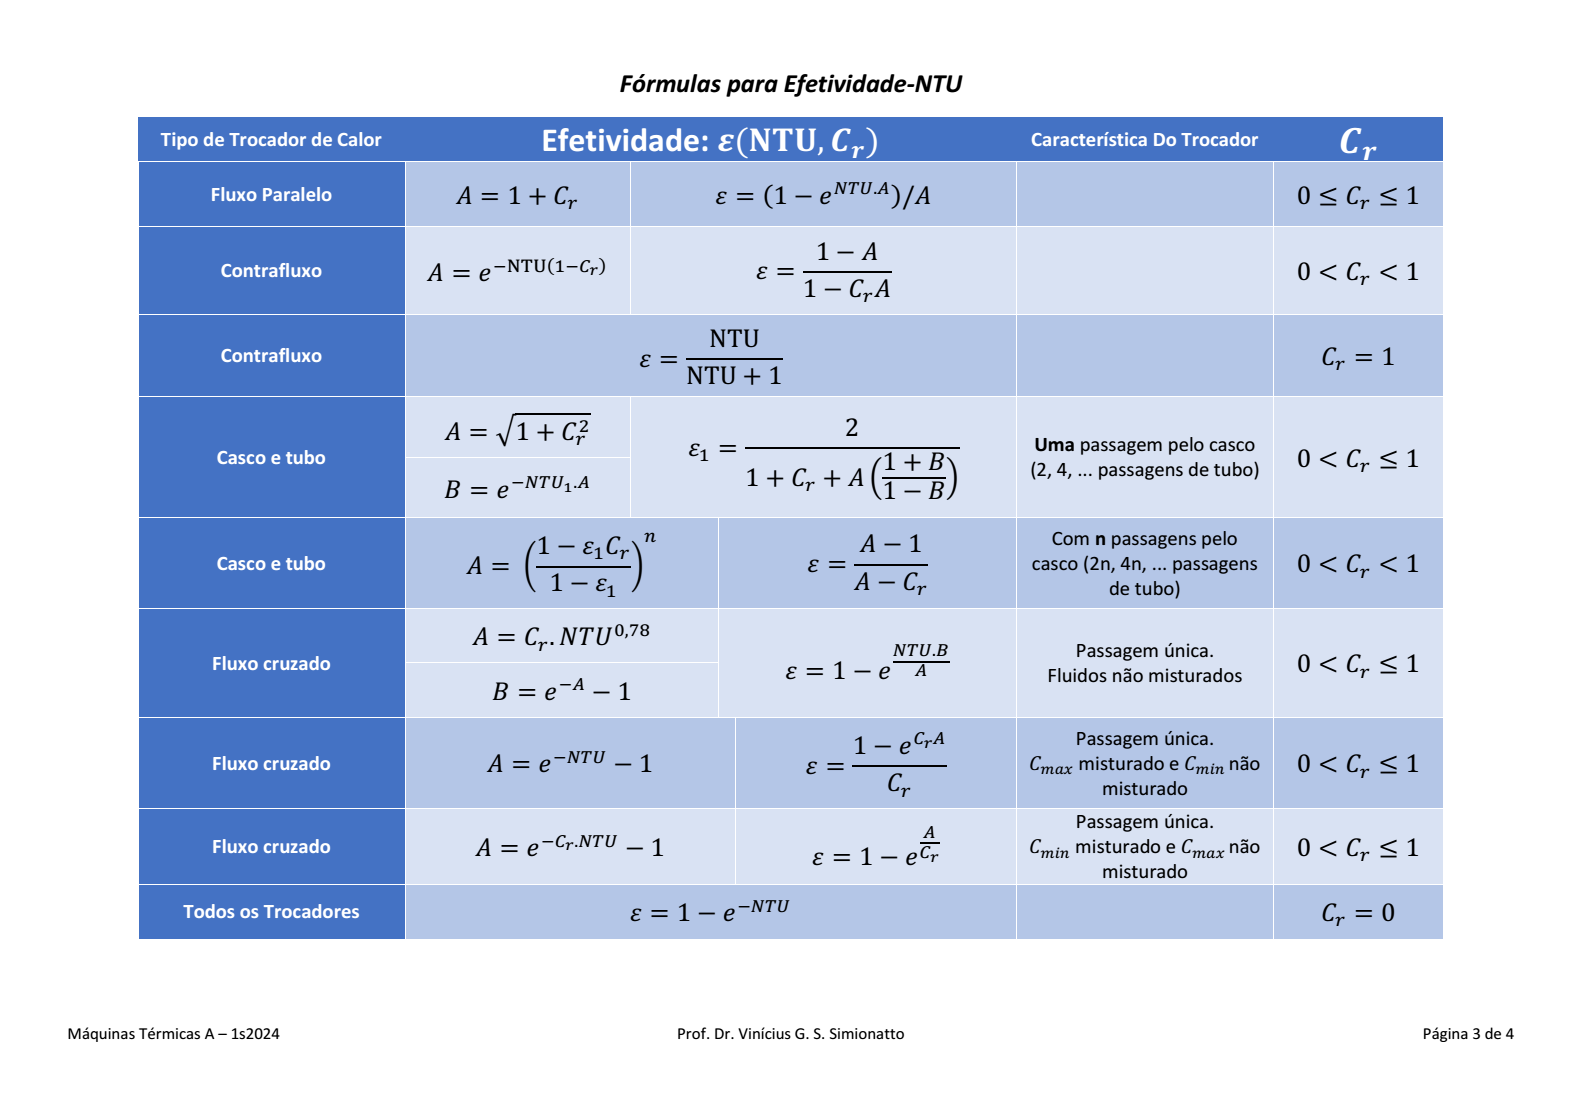

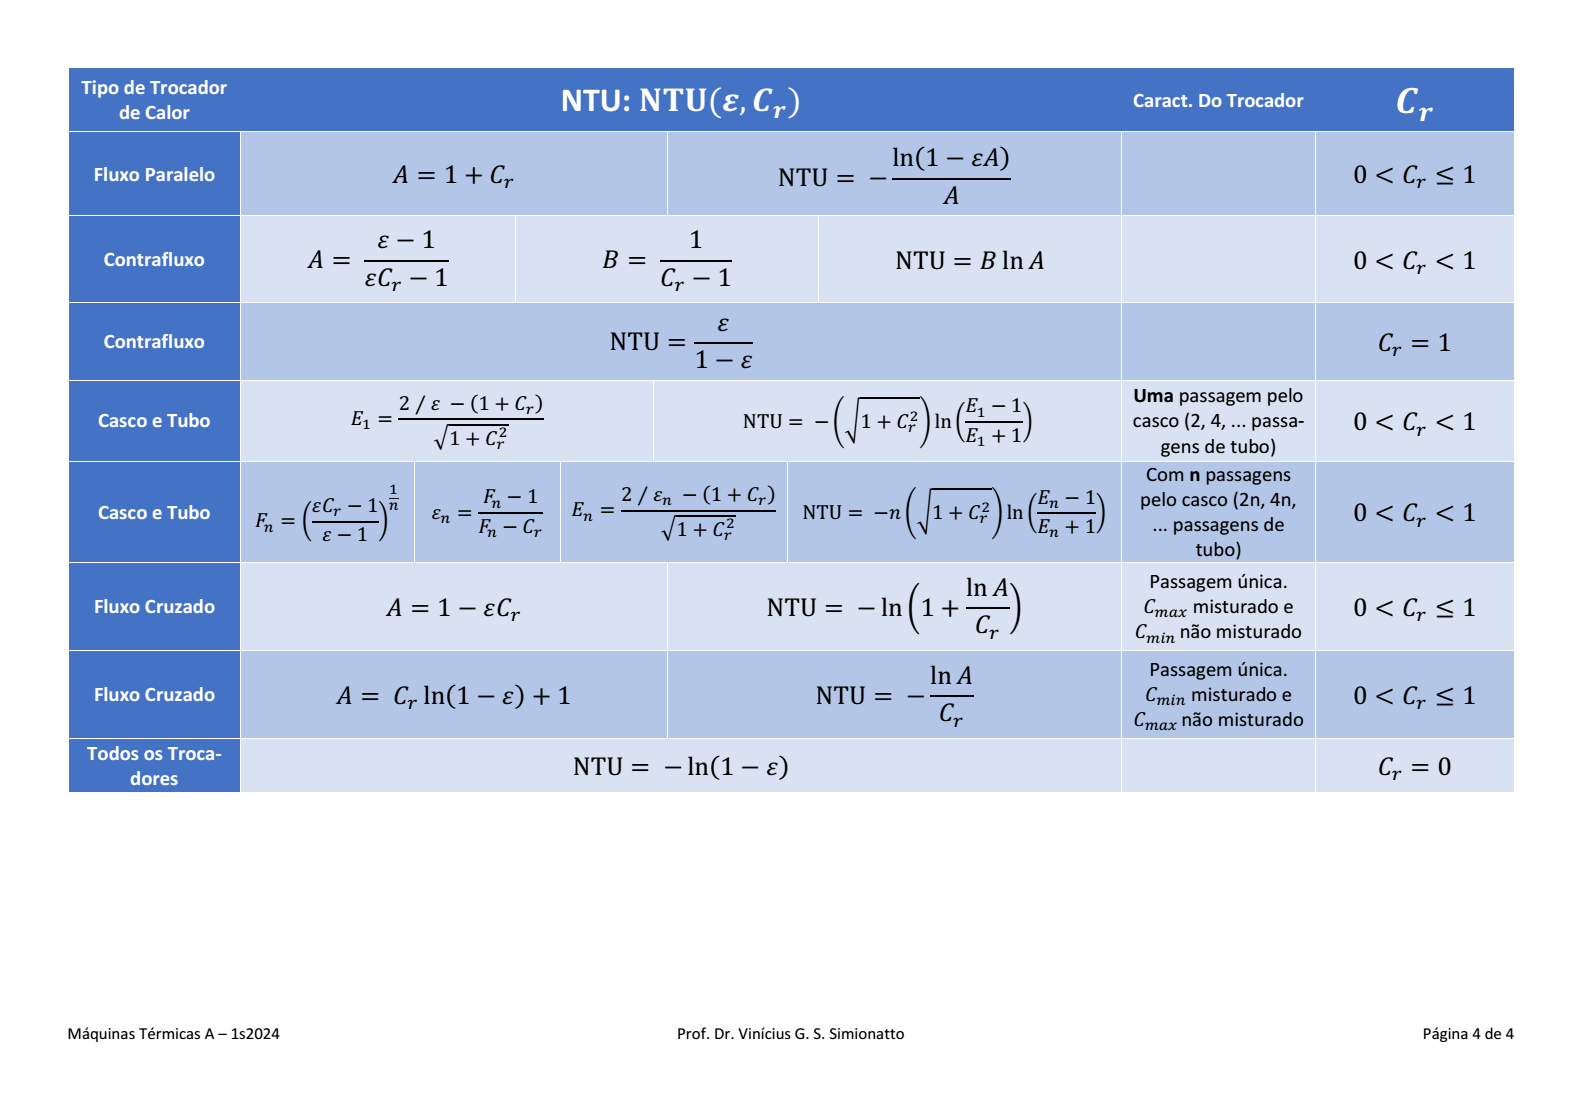

## Resolução

### Questão 1)

Para calcular a área necessária de troca de calor, é necessário utilizar a equação do $NTU$:

$$
NTU = \frac{U A}{C_\min} \,\,\,\, \therefore \,\,\,\, A = \frac{NTU\, C_\min}{U}
$$

O coeficiente global de troca de calor é dado, bem como as vazões mássicas e os calores específicos dos fluidos. Por isso, o único dado faltante para o exercício é o do $NTU$, que é calculado com base na efetividade ($\varepsilon$) e da razão de capacidades térmicas ($C_r$), cujos dados são fornecidos.

A efetividade pode ser calculada através da equação:
$$
\dot{q} = \varepsilon C_\min (T_{Q,e}-T_{F,e})
$$

Para este cálculo, falta apenas a quantidade de calor trocada, que pode ser calculada a partir de:
$$
\dot{q} = \dot{m}_F, c_{p, F}(T_{F,s}-T_{F,e})
$$

Os cálculos de $\dot{q}$, $C_\min$, $C_r$ e $\varepsilon$ são mostrados a seguir:

In [ ]:
%reset -f

# Dados:

dm_f = 6.2  # kg/s
dm_q = 6.5  # kg/s
c_p = 1040  # J/kg.K  (é o mesmo para os dois fluidos)
T_Qe = 700  # K
T_Fe = 300  # K
T_Fs = 500  # K
U = 100     # W/m²K

# Resolução

dq = dm_f*c_p*(T_Fs-T_Fe)

print(f'q_ponto = {dq:.2f} W')

C_max = dm_q*c_p
C_min = dm_f*c_p

print(f'Cmin = {C_min:.2f} W/K')

C_r = C_min/C_max

print(f'Cr = {C_r:.4f}')

e = dq/(C_min*(T_Qe-T_Fe))

print(f'e = {e:.3f}')



q_ponto = 1289600.00 W
Cmin = 6448.00 W/K
Cr = 0.9538
e = 0.500


Com estes dados é possível calcular o NTU. Segundo o exercício, o trocador de calor é um trocador de fluxo cruzado com passagem única e ambos os fluidos não misturados.

Não há esta condição na tabela de NTU, mas há na tabela de efetividade. Assim, é possível estimar valores de NTU até que a efetividade seja igual à efetividade encontrada nos cálculos.

Os resultados são mostrados a seguir:

In [ ]:
from numpy import exp

def efetividade_fluxo_cruzado_1(NTU, Cr):
  A = Cr*NTU**0.78
  B = exp(-A)-1
  return 1 - exp(NTU*B/A)

print(f'e = {e:.4f}')

e1 =  efetividade_fluxo_cruzado_1(1, C_r)
print(f'e1 = {e1:.4f}')

e2 =  efetividade_fluxo_cruzado_1(0.8, C_r)
print(f'e2 = {e2:.4f}')

e3 =  efetividade_fluxo_cruzado_1(1.2, C_r)
print(f'e3 = {e3:.4f}')

e4 =  efetividade_fluxo_cruzado_1(1.1, C_r)
print(f'e4 = {e4:.4f}')

e5 =  efetividade_fluxo_cruzado_1(1.11, C_r)
print(f'e5 = {e5:.4f}')

NTU = 1.11

e = 0.5000
e1 = 0.4751
e2 = 0.4232
e3 = 0.5171
e4 = 0.4971
e5 = 0.4992


Dada a proximidade razoável, adota-se o valor encontrado na última tentativa para o NTU. Assim, basta calcular a área através de:

$$
A = \frac{NTU\, C_\min}{U}
$$

O resultado é mostrado a seguir

In [ ]:
U = 100  # W/m²K

A = NTU*C_min/U

print(f'A = {A:.2f} m²')

A = 71.57 m²


### Questão 2 a)

Como a temperatura de saída dos fluidos não está disponível, a única forma de se calcular a taxa de troca de calor é utilizando:
$$
\dot{q} = \varepsilon C_\min (T_{Q,e}-T_{F,e})
$$

A capacidade térmica e as temperaturas são dados, mas falta o valor da efetividade. Para calculá-la é necessário calcular o valor de $C_r$, cujos dados são fornecidos, e o de NTU, que é calculado por:
$$
NTU = \frac{UA}{C_\min}
$$

Os dados para o cálculo da área e do $C_\min$ são fornecidos, portanto é necessário calcular o coeficiente global de troca de calor.

Para calculá-lo, é necessário fazer o cálculo das resistências térmicas locais, que é dado por:
$$
\frac{1}{U_o A_o} = \frac{1}{U_i A_i} = \frac{1}{h_i A_i} + \frac{\ln(r_o/r_i)}{2\pi L k} + \frac{1}{h_o A_o}
$$

Neste ponto é necessário calcular o produto $UA$, que é o mesmo tanto tomando como referência a área interna quanto a externa dos tubos na troca de calor.

Com isso calcula-se o NTU. O cálculo do NTU é mostrado a seguir:

In [ ]:
%reset -f

from numpy import pi, log

k = 400      # W/m.K

hi = 7650    # W/m²K
ho = 11000   # W/m²K

Di = 3.6e-3  # m
Do = 3.8e-3  # m

ri = Di/2
ro = Do/2

nt = 100     # Número de tubos
Lt = 0.8     # m (comprimento de cada tubo)

Ai = pi*Di*Lt*nt
Ao = pi*Do*Lt*nt

L = nt*Lt

UA = 1/(1/(hi*Ai)+1/(ho*Ao)+log(ro/ri)/(2*pi*L*k))

dm_q = dm_f = 2.5  # kg/s (vazão mássica)

cp_q = 3660     # J/kg.K
cp_f = 4182.11  # J/kg.K

Cq = cp_q*dm_q
Cf = cp_f*dm_f

Cmin = min(Cf, Cq)
Cmax = max(Cf, Cq)

Cr = Cmin/Cmax

NTU = UA/Cmin

print(f'NTU = {NTU:.4f}')

NTU = 0.4555


Agora, com o valor do NTU e do $C_r$, é possível calcular a efetividade através das fórmulas da tabela:

$$
A = \sqrt(1+C_r^2)
$$

$$
B = e^{-NTU.A}
$$

$$
\varepsilon = \frac{2}{\displaystyle 1+C_r +A \left(\frac{1+B}{1-B}\right)}
$$

Os valores são exibidos a seguir:


In [ ]:
from numpy import sqrt, exp

def efetividade_casco_e_tubo_1p(NTU, Cr):
  A = sqrt(1+Cr**2)
  B = exp(-NTU*A)
  return 2/(1+Cr+A*(1+B)/(1-B))

e = efetividade_casco_e_tubo_1p(NTU, Cr)

print(f'e = {e:.4f}')


e = 0.3125


Agora é possível calcular o calor trocado entre as substâncias utilizando:

$$
\dot{q} = \varepsilon C_\min (T_{Q,e}-T_{F,e})
$$

O valor é mostrado a seguir:

In [ ]:
T_Qe = 80  # °C
T_Fe = 20  # °C

dq = e*Cmin*(T_Qe-T_Fe)

print(f'dq = {dq:.2f} W')

dq = 171584.28 W


### Questão 2 b)

Agora que já calculamos a taxa de troca de calor, para a temperatura de saída do fluido frio temos:

$$
\dot{q} = C_F(T_{F,s}-T_{F,e})
$$

$$
\therefore \,\,\,\, \frac{\dot{q}}{C_F} + T_{F,e} = T_{F,s}
$$

O valor é exibido a seguir:

In [ ]:
T_Fs = T_Fe + dq/Cf

print(f'T_Fs = {T_Fs:.2f} °C')

T_Fs = 36.41 °C


Já para o fluido quente, temos:

$$
\dot{q} = C_Q(T_{Q,e}-T_{Q,s})
$$

$$
\therefore \,\,\,\, T_{Q,e} - \frac{\dot{q}}{C_Q} = T_{Q,s}
$$

O resultado é exibido a seguir:

In [ ]:
T_Qs = T_Qe - dq/Cq

print(f'T_Qs = {T_Qs:.2f} °C')

T_Qs = 61.25 °C


### Questão 2 c)

Como se deseja alcançar a mesma taxa de transferência de calor e os fluidos e vazões não foram alterados, então tem-se o mesmo $C_r$, a mesma efetividade, e por consequência o mesmo valor para o NTU. Assim , tem-se o mesmo valor para o produto $UA$.

Os coeficientes de troca de calor por convecção dos lados interno e externo também não são alterados, bem como os diâmetros interno e externo. Analisando a forma da resistência térmica local:

$$
\frac{1}{UA} = \frac{1}{h_i A_i} + \frac{\ln(r_o/r_i)}{2\pi L k} + \frac{1}{h_o A_o}
$$

As áreas $A_i$ e $A_o$ são dadas por:

$$
A_i = \pi D_i L \,\,\,\,\mathrm{e} \,\,\,\,A_o = \pi D_o L
$$

Assim, a expressão se torna:

$$
\frac{1}{UA} = \frac{1}{h_i \pi D_i L} + \frac{\ln(r_o/r_i)}{2\pi L k} + \frac{1}{h_o \pi D_o L}
$$

De onde, preguiçosamente se isola $L$:

$$
L = UA\left(\frac{1}{h_i \pi D_i } + \frac{\ln(r_o/r_i)}{2\pi  k} + \frac{1}{h_o \pi D_o } \right)
$$

In [ ]:
kn = 0.31  # W/m.K

L = UA*(1/(hi*pi*Di)+1/(ho*pi*Do)+log(ro/ri)/(2*pi*kn))

Lt = L/100

print(f'Lt = {Lt:.4f} m é o novo comprimento de cada tubo')

Lt = 1.9560 m é o novo comprimento de cada tubo
